## Plots for chapter 4

In [7]:
import cmocean as cmo
import glob
import matplotlib.pyplot as plt
import matplotlib.gridspec as gspec
%matplotlib inline
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import numpy as np
from numpy.polynomial import polynomial as P
import os
import pandas as pd
import scipy.io as sio
import scipy.stats
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import sys
sys.path.append('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts')
import profiler_tools as ptools
import conduino_tools as ctools

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
def plot_uprofile(ax, col='0.8'):
    ax.axvline(15, color=col, linestyle=':')
    ax.axvline(21.0+15, color=col, linestyle=':')
    ax.axvline(71.0+15, color=col, linestyle=':')
        
def plot_forcing(ax, file, f0, f1, f2, t0, t1):
    '''ax: axes to plot figure on
       file: experiment file to extract time
       f0: Angular velocity of the table during spin up
       f1: f at max forcing
       f2: f to avoid spin down
       t0: time to get to f1
       t1: time to get to f2'''
    mat = sio.loadmat(file, squeeze_me=True)
    time = mat['time']
    t2 = np.round(np.max(time),2) # s

    ax0.text(0.3,0.3,r'$\Delta f_1=$%1.2f rad/s, $\Delta t_1=$%1.1f s' %((f1-f0),t0), transform=ax0.transAxes)
    ax0.text(0.5,0.7,r'$\Delta f_2=$%1.2f rad/s, $\Delta t_2=$%1.1f s' %((f2-f1),(t1-t0)), transform=ax0.transAxes)

    ax0.plot([0,t0,t1,t2],[f0,f1,f2,f2], 'g-')
    ax0.set_ylabel('f table / rad s$^{-1}$')
    ax0.set_xlabel('time / s')

In [3]:
# Information for all runs is stored in experiment_dictionaries.py
lib_path = os.path.abspath('/ocean/kramosmu/MultipleCanyons/lab/Conduino/scripts') # Add absolute path to my python scripts
sys.path.append(lib_path)

import experiment_dictionaries as exdic

In [4]:
exp_dicts = [exdic.T01,exdic.T02,exdic.T03,exdic.T04,exdic.T05,
             exdic.T06,exdic.T07,exdic.T08,exdic.T09,exdic.T10,
             exdic.T11,exdic.T12, exdic.DYE02]
exp_num = len(exp_dicts) # number of experiment dictionaries

exp_Norder = [exdic.T02,exdic.T03,exdic.T04,exdic.T05,exdic.T01,
             exdic.DYE02,exdic.T12,exdic.T11,exdic.T07,exdic.T06,
             exdic.T08,exdic.T10, exdic.T09]

### Time series
Using std as error bar and uncertainty if there is no std.

KeyboardInterrupt: 

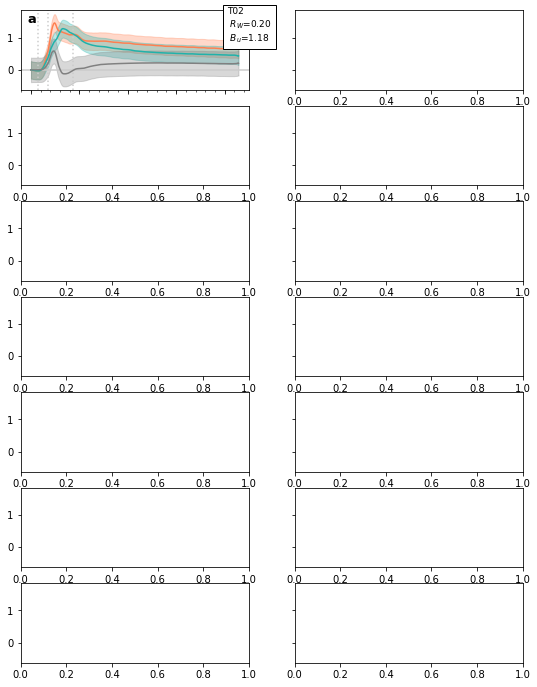

In [6]:
exp_Norder = [exdic.T02,exdic.T03,exdic.T04,exdic.T05,exdic.T01,
             exdic.DYE02,exdic.T12,exdic.T11,exdic.T07,exdic.T06,
             exdic.T08,exdic.T10, exdic.T09]
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11),(ax12,ax13)) = plt.subplots(7, 2, figsize=(9,12), 
                                                                                    sharey=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]

filepath =  exdic.T01['dir']+ exdic.T01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
exp_names = ['T02','T03', 'T04', 'T05', 'T01','DYE02', 'T12', 'T11', 
            'T07', 'T06','T08', 'T10',  'T09']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ctools.errorANK1_09Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_09Aug19(P2)*exp["drift_dns"]        
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ctools.errorANK1_17Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_17Aug19(P2)*exp["drift_dns"]  
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = ctools.filter_timeseries((dens1[:]-dens1[0]),winlen=win)
        probe2[:,ii] = ctools.filter_timeseries((dens2[:]-dens2[0]),winlen=win)
        error1[:,ii] = err1+err1[0]
        error2[:,ii] = err2+err2[0]    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.905,0.6,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    
    avg1 = np.nanmean(probe1, axis=1)
    std1 = np.nanstd(probe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
    avg2 = np.nanmean(probe2, axis=1)
    std2 = np.nanstd(probe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    avg_dif = np.nanmean(probe1-probe2, axis=1)
    std_dif = np.nanstd(probe1-probe2, axis=1)
    avg_err_dif =  np.nanmean((error1**2+error2**2)**0.5,axis=1)
    if np.nanmax(std1) > np.nanmax(avg_err1):
        ax.plot(time, avg1*1000,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(avg1+std1)*1000, (avg1-std1)*1000,color='coral', alpha=0.3)
    else:
        ax.plot(time, avg1*1000,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(avg1+avg_err1)*1000, (avg1-avg_err1)*1000,color='coral', alpha=0.3)
    
    if np.nanmax(std2) > np.nanmax(avg_err2):
        ax.plot(time, avg2*1000,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(avg2+std2)*1000, (avg2-std2)*1000,color='lightseagreen', alpha=0.3)
    else:
        ax.plot(time, avg2*1000 ,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(avg2+avg_err2)*1000, (avg2-avg_err2)*1000,color='lightseagreen', alpha=0.3)
        
    if np.nanmax(std_dif) > np.nanmax(avg_err_dif):
        ax.plot(time, avg_dif*1000,'-',color='0.5', label='Upstream-Downstream')
        ax.fill_between(time,(avg_dif+std_dif)*1000, (avg_dif-std_dif)*1000,color='0.5', alpha=0.3)
    else:
        ax.plot(time, avg_dif*1000 ,'-',color='0.5', label='Upstream-Downstream')
        ax.fill_between(time,(avg_dif+avg_err_dif)*1000, (avg_dif-avg_err_dif)*1000,color='0.5', alpha=0.3)
    
    ax.text(0.03,0.85, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])
ax13.axis("off")
for ax in [ax0,ax2,ax4,ax6,ax8, ax10,ax12]:
    ax.set_ylabel(r'$\Delta \rho$ / $10^{-3}$gcm$^{-3}$')
ax12.set_xlabel('time / s')
ax11.set_xlabel('time / s')
ax12.set_xticks([0,100,200,300,400])
ax11.set_xticks([0,100,200,300,400])
ax12.set_xticklabels(['0','100','200','300','400'])
ax11.set_xticklabels(['0','100','200','300','400'])
ax12.legend(bbox_to_anchor=(1.25,0.8))
plt.savefig('figures/ch4_twocanyon_timeseries.pdf', format='pdf', transparent=False, bbox_inches='tight')

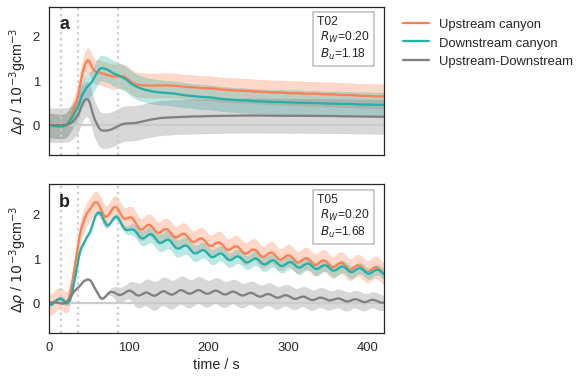

In [19]:
sns.set_context('talk')
sns.set_style('white')
exp_Norder = [exdic.T02,exdic.T05]
fig, (ax0,ax1) = plt.subplots(2, 1, figsize=(6,6), sharey=True, sharex=True)

axs = [ax0,ax1]

filepath =  exdic.T01['dir']+ exdic.T01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b']
exp_names = ['T02','T05']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ctools.errorANK1_09Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_09Aug19(P2)*exp["drift_dns"]        
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ctools.errorANK1_17Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_17Aug19(P2)*exp["drift_dns"]  
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = ctools.filter_timeseries((dens1[:]-dens1[0]),winlen=win)
        probe2[:,ii] = ctools.filter_timeseries((dens2[:]-dens2[0]),winlen=win)
        error1[:,ii] = err1+err1[0]
        error2[:,ii] = err2+err2[0]    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.8,0.65,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=12,
            bbox=dict(facecolor='white', alpha=1) )
    
    avg1 = np.nanmean(probe1, axis=1)
    std1 = np.nanstd(probe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
    avg2 = np.nanmean(probe2, axis=1)
    std2 = np.nanstd(probe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    avg_dif = np.nanmean(probe1-probe2, axis=1)
    std_dif = np.nanstd(probe1-probe2, axis=1)
    avg_err_dif =  np.nanmean((error1**2+error2**2)**0.5,axis=1)
    if np.nanmax(std1) > np.nanmax(avg_err1):
        ax.plot(time, avg1*1000,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(avg1+std1)*1000, (avg1-std1)*1000,color='coral', alpha=0.3)
    else:
        ax.plot(time, avg1*1000,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(avg1+avg_err1)*1000, (avg1-avg_err1)*1000,color='coral', alpha=0.3)
    
    if np.nanmax(std2) > np.nanmax(avg_err2):
        ax.plot(time, avg2*1000,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(avg2+std2)*1000, (avg2-std2)*1000,color='lightseagreen', alpha=0.3)
    else:
        ax.plot(time, avg2*1000 ,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(avg2+avg_err2)*1000, (avg2-avg_err2)*1000,color='lightseagreen', alpha=0.3)
        
    if np.nanmax(std_dif) > np.nanmax(avg_err_dif):
        ax.plot(time, avg_dif*1000,'-',color='0.5', label='Upstream-Downstream')
        ax.fill_between(time,(avg_dif+std_dif)*1000, (avg_dif-std_dif)*1000,color='0.5', alpha=0.3)
    else:
        ax.plot(time, avg_dif*1000 ,'-',color='0.5', label='Upstream-Downstream')
        ax.fill_between(time,(avg_dif+avg_err_dif)*1000, (avg_dif-avg_err_dif)*1000,color='0.5', alpha=0.3)
    
    ax.text(0.03,0.85, pan_lab, fontweight='bold', fontsize=18, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$gcm$^{-3}$')
ax1.set_ylabel(r'$\Delta \rho$ / $10^{-3}$gcm$^{-3}$')
ax1.set_xlabel('time / s')
ax1.set_xticks([0,100,200,300,400])
ax1.set_xticklabels(['0','100','200','300','400'])
ax0.legend(bbox_to_anchor=(1.6,1))
ax1.set_xlim(0,420)
plt.savefig('figures/twocanyon_timeseries_talk.pdf', format='pdf', transparent=False, bbox_inches='tight')

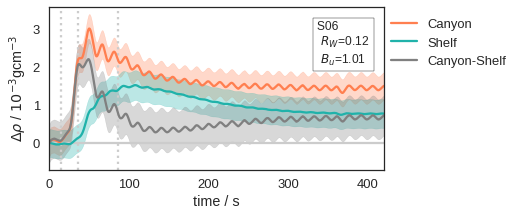

In [20]:
sns.set_context('talk')
sns.set_style('white')
exp_Norder = [exdic.S06]
fig, (ax0) = plt.subplots(1, 1, figsize=(6,3))

axs = [ax0]

filepath =  exdic.S06['dir']+ exdic.S06['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = [' ']
exp_names = ['S06']
                              
rho0=998.5
g = 9.81

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    probe1 = np.zeros((len(time),len(exp['run_files'])))
    probe2 = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
  
    Navg = np.ones((4))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ctools.errorANK1_09Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_09Aug19(P2)*exp["drift_dns"]        
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ctools.errorANK1_17Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_17Aug19(P2)*exp["drift_dns"]  
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        probe1[:,ii] = ctools.filter_timeseries((dens1[:]-dens1[0]),winlen=win)
        probe2[:,ii] = ctools.filter_timeseries((dens2[:]-dens2[0]),winlen=win)
        error1[:,ii] = err1+err1[0]
        error2[:,ii] = err2+err2[0]    
        Navg[ii] = ((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5 
    
    N = np.nanmean(Navg)
    W = 5 # W at half length (cm)
    Bu = (N*exp["hsb"])/(exp["fo"]*W)
    Rw = (exp["U"])/(exp["fo"]*W)
    ax.axhline(0, color='0.8')
    plot_uprofile(ax)
    ax.text(0.8,0.65,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=12,
            bbox=dict(facecolor='white', alpha=1) )
    
    avg1 = np.nanmean(probe1, axis=1)
    std1 = np.nanstd(probe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
    avg2 = np.nanmean(probe2, axis=1)
    std2 = np.nanstd(probe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    avg_dif = np.nanmean(probe1-probe2, axis=1)
    std_dif = np.nanstd(probe1-probe2, axis=1)
    avg_err_dif =  np.nanmean((error1**2+error2**2)**0.5,axis=1)
    if np.nanmax(std1) > np.nanmax(avg_err1):
        ax.plot(time, avg1*1000,'-',color='coral', label='Canyon')
        ax.fill_between(time,(avg1+std1)*1000, (avg1-std1)*1000,color='coral', alpha=0.3)
    else:
        ax.plot(time, avg1*1000,'-',color='coral', label='Canyon')
        ax.fill_between(time,(avg1+avg_err1)*1000, (avg1-avg_err1)*1000,color='coral', alpha=0.3)
    
    if np.nanmax(std2) > np.nanmax(avg_err2):
        ax.plot(time, avg2*1000,'-',color='lightseagreen', label='Shelf')
        ax.fill_between(time,(avg2+std2)*1000, (avg2-std2)*1000,color='lightseagreen', alpha=0.3)
    else:
        ax.plot(time, avg2*1000 ,'-',color='lightseagreen', label='Shelf')
        ax.fill_between(time,(avg2+avg_err2)*1000, (avg2-avg_err2)*1000,color='lightseagreen', alpha=0.3)
        
    if np.nanmax(std_dif) > np.nanmax(avg_err_dif):
        ax.plot(time, avg_dif*1000,'-',color='0.5', label='Canyon-Shelf')
        ax.fill_between(time,(avg_dif+std_dif)*1000, (avg_dif-std_dif)*1000,color='0.5', alpha=0.3)
    else:
        ax.plot(time, avg_dif*1000 ,'-',color='0.5', label='Canyon-Shelf')
        ax.fill_between(time,(avg_dif+avg_err_dif)*1000, (avg_dif-avg_err_dif)*1000,color='0.5', alpha=0.3)
    
    ax.text(0.03,0.85, pan_lab, fontweight='bold', fontsize=18, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])
ax0.set_ylabel(r'$\Delta \rho$ / $10^{-3}$gcm$^{-3}$')
ax0.set_xlabel('time / s')
ax0.set_xticks([0,100,200,300,400])
ax0.set_xticklabels(['0','100','200','300','400'])
ax0.legend(bbox_to_anchor=(1.4,1))
ax0.set_xlim(0,420)
plt.savefig('figures/onecanyon_timeseries_talk.pdf', format='pdf', transparent=False, bbox_inches='tight')

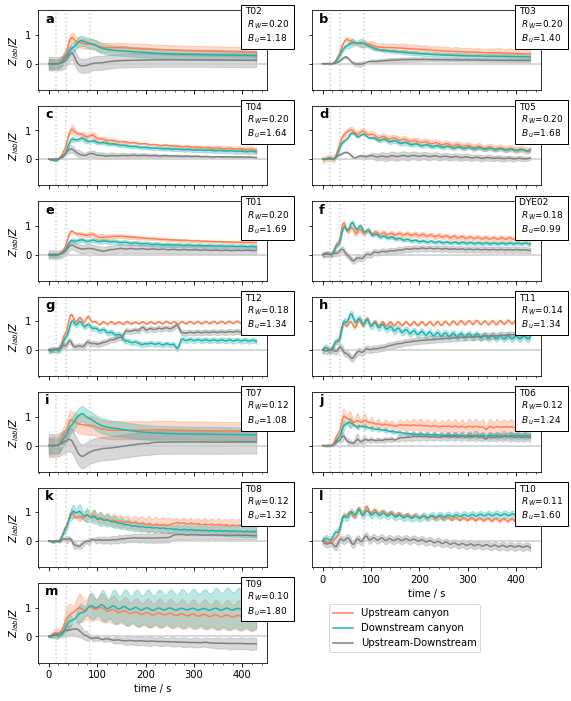

In [11]:
sns.set_context('paper')
fig, ((ax0,ax1),(ax2,ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9),(ax10,ax11),(ax12,ax13)) = plt.subplots(7, 2, figsize=(9,12), 
                                                                                    sharey=True)

axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
filepath =  exdic.T01['dir']+ exdic.T01['run_files'][0]
mat = sio.loadmat(filepath, squeeze_me=True)
time = mat['time']
panel_labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
exp_names = ['T02','T03', 'T04', 'T05', 'T01','DYE02', 'T12', 'T11', 
            'T07', 'T06','T08', 'T10',  'T09']
rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

for exp, kk, ax,pan_lab, name in zip(exp_Norder, range(exp_num), axs, panel_labels, exp_names):
    Zprobe1 = np.zeros((len(time),len(exp['run_files'])))
    Zprobe2 = np.zeros((len(time),len(exp['run_files'])))
    Zprobe_dif = np.zeros((len(time),len(exp['run_files'])))
    error1 = np.zeros((len(time),len(exp['run_files'])))
    error2 = np.zeros((len(time),len(exp['run_files'])))
    error_dif = np.zeros((len(time),len(exp['run_files'])))
    
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
         
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ctools.errorANK1_09Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_09Aug19(P2)*exp["drift_dns"]        
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ctools.errorANK1_17Aug19(P1)*exp["drift_ups"]        
            err2 = ctools.errorANK2_17Aug19(P2)*exp["drift_dns"]        
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
            
        Zprobe1[:,ii] = 100*(((g/rho0)*1000*ctools.filter_timeseries((dens1-dens1[0]),winlen=win))/N[ii]**2) # cm
        Zprobe2[:,ii] = 100*(((g/rho0)*1000*ctools.filter_timeseries((dens2-dens2[0]),winlen=win))/N[ii]**2)
        Zprobe_dif[:,ii] = Zprobe1[:,ii]-Zprobe2[:,ii]
        error1[:,ii] = 100*(g/rho0)*(1000*(err1+err1[0]))/N[ii]**2
        error2[:,ii] = 100*(g/rho0)*(1000*(err2+err2[0]))/N[ii]**2
        error_dif[:,ii]= (error1[:,ii]**2+error2[:,ii]**2)**0.5
    
    Navg = np.nanmean(N)
    f = exp["fo"] # rad/s
    U = exp["U"]/100 # m/s
    Hs = exp["hsb"]/100 # m
    Fr = np.nanmean(U/(N*Hs))
    Bu = np.nanmean(N*Hs/(f*W))
    s = (0.029-0.005)/(0.215) # (Hsb-Hcoast)/(dist coast to sb) = 0.112
    Dh = (f*L)/Navg
    Rw = U/(f*W)
    Rl = U/(f*L)
    Fw = Rw/(0.9+Rw)
    Se = (s*Navg)/(f*((Fw/Rl)**0.5))
    Z_HA2013 = 100*Dh*((1.8*((Fw*Rl)**0.5)*(1-0.42*Se))+0.05) # cm
    plot_uprofile(ax)
    
    ax.text(0.905,0.6,'%s \n $R_W$=%1.2f \n $B_u$=%1.2f' \
            %(name,Rw,Bu), transform=ax.transAxes,fontsize=9,
            bbox=dict(facecolor='white', alpha=1) )
    ax.axhline(0, color='0.8')
    Zavg1 = np.nanmean(Zprobe1, axis=1)
    Zstd1 = np.nanstd(Zprobe1, axis=1)
    avg_err1 = np.nanmean(error1,axis=1)
    Zavg2 = np.nanmean(Zprobe2, axis=1)
    Zstd2 = np.nanstd(Zprobe2, axis=1)
    avg_err2 = np.nanmean(error2,axis=1)
    Zavg3 = np.nanmean(Zprobe_dif, axis=1)
    Zstd3 = np.nanstd(Zprobe_dif, axis=1)
    avg_err_dif = np.nanmean(error_dif,axis=1)
    
    if np.nanmax(Zstd1) > np.nanmax(avg_err1):
        ax.plot(time, Zavg1/Z_HA2013,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(Zavg1+Zstd1)/Z_HA2013, (Zavg1-Zstd1)/Z_HA2013,color='coral', alpha=0.3)
    else:
        ax.plot(time, Zavg1/Z_HA2013,'-',color='coral', label='Upstream canyon')
        ax.fill_between(time,(Zavg1+avg_err1)/Z_HA2013, (Zavg1-avg_err1)/Z_HA2013,color='coral', alpha=0.3)
    
    if np.nanmax(Zstd2) > np.nanmax(avg_err2):
        ax.plot(time, Zavg2/Z_HA2013 ,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(Zavg2+Zstd2)/Z_HA2013, (Zavg2-Zstd2)/Z_HA2013, color='lightseagreen', alpha=0.3)
    else:
        ax.plot(time, Zavg2/Z_HA2013 ,'-',color='lightseagreen', label='Downstream canyon')
        ax.fill_between(time,(Zavg2+avg_err2)/Z_HA2013, (Zavg2-avg_err2)/Z_HA2013,color='lightseagreen', alpha=0.3)
    
    if np.nanmax(Zstd3) > np.nanmax(avg_err_dif):
         ax.plot(time, Zavg3/Z_HA2013 ,'-',color='0.5', label='Upstream-Downstream')
         ax.fill_between(time, (Zavg3+Zstd3)/Z_HA2013, (Zavg3-Zstd3)/Z_HA2013,
                         color='0.5', alpha=0.3)
    else:
        ax.plot(time, Zavg3/Z_HA2013 ,'-',color='0.5', label='Upstream-Downstream')
        ax.fill_between(time, (Zavg3+avg_err_dif)/Z_HA2013, (Zavg3-avg_err_dif)/Z_HA2013,
                         color='0.5', alpha=0.3)
    ax.text(0.03,0.85, pan_lab, fontweight='bold', fontsize=13, transform=ax.transAxes)
    ax.xaxis.set_major_locator(MultipleLocator(100))
    ax.xaxis.set_minor_locator(MultipleLocator(20))
    ax.set_xticklabels([])
ax13.axis("off")
for ax in [ax0,ax2,ax4,ax6,ax8, ax10,ax12]:
    ax.set_ylabel(r'$Z_{lab}/Z$')
ax12.set_xlabel('time / s')
ax11.set_xlabel('time / s')
ax12.set_xticks([0,100,200,300,400])
ax11.set_xticks([0,100,200,300,400])
ax12.set_xticklabels(['0','100','200','300','400'])
ax11.set_xticklabels(['0','100','200','300','400']) 
ax12.legend(bbox_to_anchor=(1.25,0.8))
plt.savefig('figures/CH4_twocanyon_Ztimeseries.pdf', format='pdf', transparent=False, bbox_inches='tight')

### 2.  $Z_{lab}$ vs $Z$
Keep the largest between std and error.

In [8]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

the rmse1 is 0.137472
the rmse2 is 0.227485
100 x rmse1 / max Z = 8.17
100 x rmse1 / min Z = 22.75
100 x rmse1 / mean Z = 12.41
100 x rmse2 / max Z = 13.51
100 x rmse2 / min Z = 37.64
100 x rmse2 / mean Z = 20.53


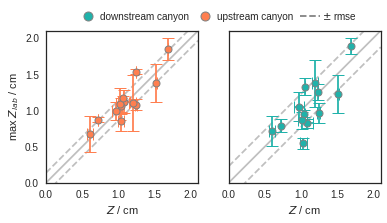

In [38]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(6,3), sharey=True)

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

Z_list1 = []
Z_list2 = []
Z_HA2013_list = []

for exp, kk in zip(exp_dicts, range(exp_num)):
    delta_rho1 = np.zeros(len(exp['run_files']))
    delta_rho2 = np.zeros(len(exp['run_files']))
    error1 = np.zeros(len(exp['run_files']))
    error2 = np.zeros(len(exp['run_files']))
    N = np.ones(len(exp['run_files']))*np.nan
    Z_HA2013 = np.zeros(len(exp['run_files']))
    for ii in range(len(exp['run_files'])):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        delta_rho2[ii] = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1[ii] = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        max_ind1 = np.argmax((ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win)))
        max_ind2 = np.argmax((ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win)))
        error1[ii] = 1000*(err1[max_ind1]+err1[0])
        error2[ii] = 1000*(err2[max_ind2]+err2[1])    
        
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        f = exp["fo"] # rad/s
        U = exp["U"]/100 # m/s
        Hs = exp["hsb"]/100 # m
        s = (0.029-0.005)/(0.215) # (Hsb-Hcoast)/(dist coast to sb) = 0.112
        Dh = (f*L)/N[ii]
        Rw = U/(f*W)
        Rl = U/(f*L)
        Fw = Rw/(0.9+Rw)
        Se = (s*N[ii])/(f*((Fw/Rl)**0.5))
        Z_HA2013[ii] = Dh*((1.8*((Fw*Rl)**0.5)*(1-0.42*Se))+0.05)
    
    Z_HA = np.nanmean(Z_HA2013)*100
    stdHA = np.nanstd(Z_HA2013)*100
    Z1 = np.nanmean(100*(g/rho0)*(delta_rho1/N**2)) #cm
    Z2 = np.nanmean(100*(g/rho0)*(delta_rho2/N**2)) #cm
    std1 = np.nanstd(100*(g/rho0)*(delta_rho1/N**2)) #cm
    std2 = np.nanstd(100*(g/rho0)*(delta_rho2/N**2)) #cm
    errZ1 = np.nanmean(100*(g/rho0)*(error1/N**2))
    errZ2 = np.nanmean(100*(g/rho0)*(error2/N**2))
      
    if std1 > errZ1:
        yerror1 = std1
    else:
        yerror1 = errZ1
    
    if std2 > errZ2:
        yerror2 = std2
    else:
        yerror2 = errZ2
    
    Z_list1.append(Z1)
    Z_list2.append(Z2)
    Z_HA2013_list.append(Z_HA)
    
    sca = ax1.errorbar(Z_HA,Z1,yerr=yerror1,xerr=stdHA,
                       marker='o',color='coral', 
                       markeredgecolor='0.5', 
                       markeredgewidth=1,capsize=6) 
    sca2 = ax2.errorbar(Z_HA,Z2,yerr=yerror2,xerr=stdHA,
                        marker='o',color='lightseagreen',
                        markeredgecolor='0.5',
                        markeredgewidth=1,capsize=6) 

rmse1 = (mean_squared_error(Z_HA2013_list, Z_list1))**0.5
rmse2 = (mean_squared_error(Z_HA2013_list, Z_list2))**0.5
print('the rmse1 is %f' %rmse1)        
print('the rmse2 is %f' %rmse2)        

percent_error1_max = (rmse1*100)/np.max(Z_HA2013_list)
percent_error1_min = (rmse1*100)/np.min(Z_HA2013_list)
percent_error1_mean = (rmse1*100)/np.mean(Z_HA2013_list)
percent_error2_max = (rmse2*100)/np.max(Z_HA2013_list)
percent_error2_min = (rmse2*100)/np.min(Z_HA2013_list)
percent_error2_mean = (rmse2*100)/np.mean(Z_HA2013_list)

print('100 x rmse1 / max Z = %1.2f' % percent_error1_max)
print('100 x rmse1 / min Z = %1.2f' % percent_error1_min)
print('100 x rmse1 / mean Z = %1.2f' % percent_error1_mean)
print('100 x rmse2 / max Z = %1.2f' % percent_error2_max)
print('100 x rmse2 / min Z = %1.2f' % percent_error2_min)
print('100 x rmse2 / mean Z = %1.2f' % percent_error2_mean)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='downstream canyon',
                          markerfacecolor='lightseagreen',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], marker='o', color='w', label='upstream canyon',
                          markerfacecolor='coral',markeredgecolor='0.5',markeredgewidth=1,
                          markersize=9),
                   Line2D([0], [0], linestyle='--',color='0.5', label='$\pm$ rmse'),
                   ]
ax2.legend(handles=legend_elements,ncol=3, columnspacing=0.6,handletextpad=0.2, bbox_to_anchor=(0.9,1.19))
ax1.set_xlabel('$Z$ / cm')
ax2.set_xlabel('$Z$ / cm')
ax1.set_ylabel(r'max $Z_{lab}$ / cm')
ax1.set_xlim(0,2.1)
ax1.set_ylim(0,2.1)
ax1.set_aspect(1)
ax2.set_xlim(0,2.1)
ax2.set_ylim(0,2.1)
ax2.set_aspect(1)
ax1.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20), '-', color='0.5', alpha = 0.5,zorder=1)
ax1.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20)+rmse1, '--', color='0.5', alpha = 0.5,zorder=1)
ax1.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20)-rmse1, '--', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20), '-', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20)+rmse2, '--', color='0.5', alpha = 0.5,zorder=1)
ax2.plot(np.linspace(0,2.1,20),np.linspace(0,2.1,20)-rmse2, '--', color='0.5', alpha = 0.5,zorder=1)
plt.savefig('figures/ch4_Z_vs_Z_HA2013_twocan.eps', format='eps', transparent=False, bbox_inches='tight')

### 3. DIfference between max($Z_{lab}$) in the upstream and downstream canyons

Bu vs metric
slope 0.273750, intercept -0.309268, r_val 0.378251, p_val 0.202527, std_err 0.201999
Bu and metric are not signifiacnly correlated
Rw vs metric
slope 2.545472, intercept -0.331422, r_val 0.551833, p_val 0.050558, std_err 1.159864
Although p value is > 0.05 it is close to being significantly correlated


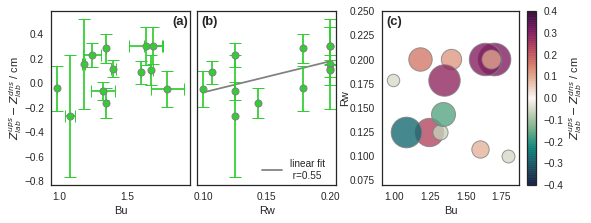

In [32]:
fig = plt.figure(figsize=(9,3.2))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[2,1.2])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

Z_list1 = []
Z_list2 = []
Z_HA2013_list = []
Z_array=[]
Bu_array=[]
Rw_array=[]

for exp, kk in zip(exp_dicts, range(exp_num)):
    Z1 = np.zeros(len(exp['run_files']))
    Z2 = np.zeros(len(exp['run_files']))
    errZ1 = np.zeros(len(exp['run_files']))
    errZ2 = np.zeros(len(exp['run_files']))
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        delta_rho2 = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1 = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        max_ind1 = np.argmax((ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win)))
        max_ind2 = np.argmax((ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win)))
        error1 = 1000*(err1[max_ind1]+err1[0])
        error2 = 1000*(err2[max_ind2]+err2[1])    
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
        Z1[ii] = (100*(g/rho0)*(delta_rho1/N[ii]**2)) #cm
        Z2[ii] = (100*(g/rho0)*(delta_rho2/N[ii]**2)) #cm
        errZ1[ii] = (100*(g/rho0)*(error1/N[ii]**2))
        errZ2[ii] = (100*(g/rho0)*(error2/N[ii]**2))
    
    W = 5 # cm
    Bu = np.nanmean(N*exp["hsb"]/(exp["fo"]*W))
    stdBu = np.nanstd(N*exp["hsb"]/(exp["fo"]*W))
    Rw = exp["U"]/(exp["fo"]*W)
    Zdif = np.nanmean(Z1-Z2)
    std_dif = np.nanstd(Z1-Z2)
    err_Zdif = np.nanmean((errZ1**2+errZ2**2)**0.5)
    
    if std_dif > err_Zdif:
        yerror = std_dif
    else:
        yerror = err_Zdif
    
    sca = ax1.errorbar(Bu,Zdif,yerr=yerror,xerr=stdBu,
                       marker='o',color='limegreen',
                       markeredgecolor='0.5', markeredgewidth=1,capsize=6) 
          
    sca2 = ax2.errorbar(Rw,Zdif,yerr=yerror,
                        marker='o',color='limegreen',
                        markeredgecolor='0.5', markeredgewidth=1,capsize=6)
    sca3 = ax3.scatter(Bu,Rw,
                       s=3500*(abs(Zdif)),
                       c=Zdif,
                       cmap = cmo.cm.curl,
                       marker = 'o',
                       vmax=0.4,
                       vmin=-0.4,
                       edgecolors='0.5',
                       linewidth=1, alpha=0.8,
                       ) 
    Z_array.append(Zdif)
    Bu_array.append(Bu)
    Rw_array.append(Rw)
   
cb = plt.colorbar(sca3)
cb.set_label(r'$Z_{lab}^{ups}-Z_{lab}^{dns}$ / cm')
ax3.set_ylim(0.07,0.25)
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax2.set_yticklabels([])
ax3.set_ylabel('Rw', labelpad=0)
ax3.set_xlabel('Bu')
ax1.set_ylabel(r'$Z_{lab}^{ups}-Z_{lab}^{dns}$ / cm', labelpad=0.1)
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)

slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(np.array(Bu_array),np.array(Z_array))

slope2, intercept2, r_value2, p_value2, std_err2 = \
scipy.stats.linregress(np.array(Rw_array),np.array(Z_array))

xx2 = np.linspace(0.1,0.2,20)
ax2.plot(xx2,(slope2*xx2)+intercept2,'-', color='0.5', zorder=0,
         label='linear fit \n r=%1.2f' %r_value2)
ax2.legend(bbox_to_anchor=(0.4,0.2))

print('Bu vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope, intercept, r_value, p_value, std_err))
print('Bu and metric are not signifiacnly correlated')
print('Rw vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope2, intercept2, r_value2, p_value2, std_err2))
print('Although p value is > 0.05 it is super close to being significantly correlated')

plt.savefig('figures/ch4_diff_Zlab_Bu_Rw_twocan.pdf', format='pdf', transparent=False, bbox_inches='tight')

Bu vs metric
slope 0.247245, intercept -0.279627, r_val 0.374572, p_val 0.207313, std_err 0.184531
Bu and metric are not signifiacnly correlated
Rw vs metric
slope 2.205649, intercept -0.284683, r_val 0.524273, p_val 0.065884, std_err 1.080173
Although p value is > 0.05 it is close to being significantly correlated


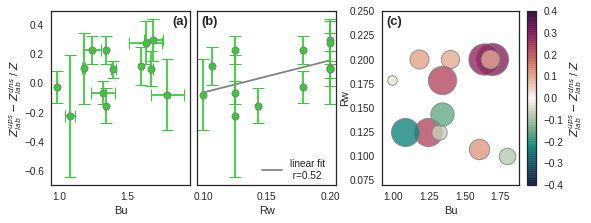

In [29]:
fig = plt.figure(figsize=(9,3.2))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[2,1.2])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
Z_array=[]
Bu_array=[]
Rw_array=[]

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

for exp, kk in zip(exp_dicts, range(exp_num)):
    Z1 = np.zeros(len(exp['run_files']))
    Z2 = np.zeros(len(exp['run_files']))
    Z_HA2013 = np.zeros(len(exp['run_files']))
    errZ1 = np.zeros(len(exp['run_files']))
    errZ2 = np.zeros(len(exp['run_files']))
    N = np.ones(len(exp['run_files']))*np.nan
    for ii in range(len(exp['run_files'])):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
            err1 = ((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
            err1 = ((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = ((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        delta_rho2 = 1000*(np.max(ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win))) # kg/m^3
        delta_rho1 = 1000*(np.max(ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win))) # kg/m^3
        max_ind1 = np.argmax((ctools.filter_timeseries(dens1[0:2400]-dens1[0],winlen=win)))
        max_ind2 = np.argmax((ctools.filter_timeseries(dens2[0:2400]-dens2[0],winlen=win)))
        error1 = 1000*(err1[max_ind1]+err1[0])
        error2 = 1000*(err2[max_ind2]+err2[1])    
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
        
        f = exp["fo"] # rad/s
        U = exp["U"]/100 # m/s
        Hs = exp["hsb"]/100 # m
        s = (0.029-0.005)/(0.215) # (Hsb-Hcoast)/(dist coast to sb) = 0.112
        Dh = (f*L)/N[ii]
        Rw = U/(f*W)
        Rl = U/(f*L)
        Fw = Rw/(0.9+Rw)
        Se = (s*N[ii])/(f*((Fw/Rl)**0.5))
        Z_HA2013[ii] = 100*Dh*((1.8*((Fw*Rl)**0.5)*(1-0.42*Se))+0.05)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        Z1[ii] = (100*(g/rho0)*(delta_rho1/N[ii]**2)) #cm
        Z2[ii] = (100*(g/rho0)*(delta_rho2/N[ii]**2)) #cm
        errZ1[ii] = (100*(g/rho0)*(error1/N[ii]**2))
        errZ2[ii] = (100*(g/rho0)*(error2/N[ii]**2))
    
    Z_HA = np.nanmean(Z_HA2013)
    stdHA = np.nanstd(Z_HA2013)
    
    Bu = np.nanmean(N*exp["hsb"]/(exp["fo"]*(W*100)))
    stdBu = np.nanstd(N*exp["hsb"]/(exp["fo"]*(W*100)))
    Rw = exp["U"]/(exp["fo"]*(W*100))
    Zdif = np.nanmean(Z1-Z2)
    std_dif = np.nanstd(Z1-Z2)
    err_Zdif = np.nanmean((errZ1**2+errZ2**2)**0.5)
    if std_dif > err_Zdif:
        yerror = std_dif
    else:
        yerror = err_Zdif
    
    sca = ax1.errorbar(Bu,Zdif/Z_HA,yerr=yerror/Z_HA,xerr=stdBu,
                       marker='o',color='limegreen',
                       markeredgecolor='0.5', markeredgewidth=1,capsize=6) 
          
    sca2 = ax2.errorbar(Rw,Zdif/Z_HA,yerr=yerror/Z_HA,
                        marker='o',color='limegreen',
                        markeredgecolor='0.5', markeredgewidth=1,capsize=6)
    sca3 = ax3.scatter(Bu,Rw,
                       s=3500*(abs(Zdif/Z_HA)),
                       c=Zdif/Z_HA,
                       cmap = cmo.cm.curl,
                       marker = 'o',
                       vmax=0.4,
                       vmin=-0.4,
                       edgecolors='0.5',
                       linewidth=1, alpha=0.8,
                       ) 
    Z_array.append(Zdif/Z_HA)
    Bu_array.append(Bu)
    Rw_array.append(Rw)
    
cb = plt.colorbar(sca3)
cb.set_label(r'$Z_{lab}^{ups}-Z_{lab}^{dns}$ / $Z$')
ax3.set_ylim(0.07,0.25)
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax2.set_yticklabels([])
ax3.set_ylabel('Rw', labelpad=0)
ax3.set_xlabel('Bu')
ax1.set_ylabel(r'$Z_{lab}^{ups}-Z_{lab}^{dns}$ / $Z$', labelpad=0.1)
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)

slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(np.array(Bu_array),np.array(Z_array))

slope2, intercept2, r_value2, p_value2, std_err2 = \
scipy.stats.linregress(np.array(Rw_array),np.array(Z_array))

xx2 = np.linspace(0.1,0.2,20)
ax2.plot(xx2,(slope2*xx2)+intercept2,'-', color='0.5', zorder=0,
         label='linear fit \n r=%1.2f' %r_value2)
ax2.legend(bbox_to_anchor=(0.4,0.2))

print('Bu vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope, intercept, r_value, p_value, std_err))
print('Bu and metric are not signifiacnly correlated')
print('Rw vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope2, intercept2, r_value2, p_value2, std_err2))
print('Although p value is > 0.05 it is close to being significantly correlated')

plt.savefig('figures/ch4_diff_norm_Zlab_Bu_Rw_twocan.pdf', format='pdf', transparent=False, bbox_inches='tight')

### 4. Pool interaction metric 

1.694,0.346,0.069,0.107
1.182,0.688,0.011,0.260
1.399,0.348,0.019,0.077
1.636,0.399,0.121,0.117
1.680,0.255,0.011,0.087
1.241,0.381,0.067,0.111
1.081,0.737,0.037,0.346
1.322,0.365,0.088,0.053
1.797,0.266,0.120,0.132
1.601,0.269,0.000,0.066
1.343,0.418,0.000,0.085
1.344,0.402,0.000,0.083
0.988,0.669,0.000,0.126
Bu vs metric
slope 1.000000, intercept 0.000000, r_val 1.000000, p_val 0.000000, std_err 0.000000
Rw vs metric
slope 0.049261, intercept 1.400474, r_val 0.007729, p_val 0.980008, std_err 1.921663
Rw and metric are not significantly correlated


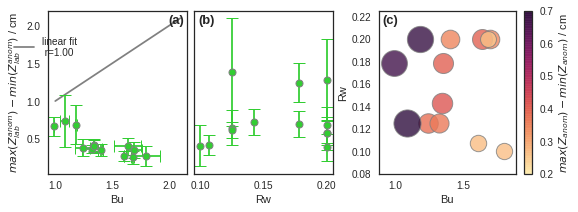

In [9]:
sns.set_style('white')
fig = plt.figure(figsize=(9,3))
gg = gspec.GridSpec(1, 2, wspace=0.2, width_ratios=[2,1.2])
gg1 = gspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gg[0], 
                                    wspace=0.05, width_ratios=[1,1])

ax1 = plt.subplot(gg1[0])
ax2 = plt.subplot(gg1[1])
ax2.set_yticks([], [])
ax3 = plt.subplot(gg[1])
rho0=998.5
g = 9.81

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m
Z_array=[]
Bu_array=[]
Rw_array=[]
   
for exp, kk in zip(exp_dicts, range(exp_num)):
    Zprobe_dif = np.zeros(len(exp['run_files']))
    error_dif = np.zeros(len(exp['run_files']))
    N = np.ones(len(exp['run_files']))*np.nan
    Z_HA2013 = np.zeros(len(exp['run_files']))
    
    for ii in range(len(exp['run_files'])):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = 1000*ctools.densANK1_09Aug19(P1)
            dens2 = 1000*ctools.densANK2_09Aug19(P2)
            err1 = 1000*((ctools.errorANK1_09Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = 1000*((ctools.errorANK2_09Aug19(P2)*exp["drift_dns"])**2)**0.5
        else:
            dens1 = 1000*ctools.densANK1_17Aug19(P1)
            dens2 = 1000*ctools.densANK2_17Aug19(P2)
            err1 = 1000*((ctools.errorANK1_17Aug19(P1)*exp["drift_ups"])**2)**0.5        
            err2 = 1000*((ctools.errorANK2_17Aug19(P2)*exp["drift_dns"])**2)**0.5
         
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
             
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
       
        Zprobe1 = (g/rho0)*(ctools.filter_timeseries((dens1[0:2400]-dens1[0]),winlen=win)/N[ii]**2) # cm
        error_1 = (g/rho0)*(((err1**2+err1[0]**2)**0.5)/N[ii]**2)
        Zprobe2 = (g/rho0)*(ctools.filter_timeseries((dens2[0:2400]-dens2[0]),winlen=win)/N[ii]**2)
        error_2 = (g/rho0)*(((err2**2+err2[0]**2)**0.5)/N[ii]**2)
        difference = Zprobe1-Zprobe2
        Zprobe_dif[ii] = (np.nanmax(difference)-np.nanmin(difference))
        max_ind = np.argmax((Zprobe1-Zprobe2))
        min_ind = np.argmin((Zprobe1-Zprobe2))
        error_dif[ii] = ((error_1[max_ind]**2+error_2[max_ind]**2)**0.5)
        
    Bu = np.nanmean(N*exp["hsb"]/(exp["fo"]*(W*100)))
    stdBu = np.nanstd(N*exp["hsb"]/(exp["fo"]*(W*100)))
    Rw = exp["U"]/(exp["fo"]*(W*100))
    Z_mean = np.nanmean(Zprobe_dif)
    Z_std = np.nanstd(Zprobe_dif)
    error_Z = np.nanmean(error_dif)
    
    if Z_std > error_Z:
        yerror = Z_std
    else:
        yerror = error_Z
    
        
    sca = ax1.errorbar(Bu,100*Z_mean,yerr=100*yerror,xerr=stdBu,
                       marker='o',color='limegreen',
                       markeredgecolor='0.5', markeredgewidth=1,capsize=6) 
          
    sca2 = ax2.errorbar(Rw,100*Z_mean,yerr=100*yerror,
                        marker='o',color='limegreen',
                        markeredgecolor='0.5', markeredgewidth=1,capsize=6)
    sca3 = ax3.scatter(Bu,Rw,
                       s=1000*(abs(100*Z_mean)),
                       c=100*Z_mean,
                       cmap = cmo.cm.matter,
                       marker = 'o',
                       vmax=0.7,
                       vmin=0.2,
                       edgecolors='0.5',
                       linewidth=1,
                       alpha=0.8, 
                       ) 
    Z_array.append(Bu)
    Bu_array.append(Bu)
    Rw_array.append(Rw)
    print('%1.3f,%1.3f,%1.3f,%1.3f' %(Bu,100*Z_mean,stdBu,100*yerror))
cb = plt.colorbar(sca3)
cb.set_label(r'$max(Z_{anom})-min(Z_{anom})$ / cm')
ax3.set_ylim(0.08,0.225)
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax2.set_yticklabels([])
ax3.set_ylabel('Rw')
ax3.set_xlabel('Bu')

ax1.set_ylabel(r'$max(Z_{lab}^{anom})-min(Z_{lab}^{anom})$ / cm')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)
ax3.text(0.03,0.92,'(c)', fontweight='bold', fontsize=13, transform=ax3.transAxes)

slope, intercept, r_value, p_value, std_err = \
scipy.stats.linregress(np.array(Bu_array),np.array(Z_array))

slope2, intercept2, r_value2, p_value2, std_err2 = \
scipy.stats.linregress(np.array(Rw_array),np.array(Z_array))

xx1 = np.linspace(1,2.1,20)
ax1.plot(xx1,(slope*xx1)+intercept,'-', color='0.5', zorder=0,
         label='linear fit \n r=%1.2f' %r_value)
ax1.legend(bbox_to_anchor=(0.3,0.9))

print('Bu vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope, intercept, r_value, p_value, std_err))
print('Rw vs metric')
print('slope %f, intercept %f, r_val %f, p_val %f, std_err %f'\
      %(slope2, intercept2, r_value2, p_value2, std_err2))
print('Rw and metric are not significantly correlated')

plt.savefig('figures/ch4_Z_max_min_Bu_Rw_twocan.pdf', format='pdf', 
            transparent=False, bbox_inches='tight')

### 5. Lag between max $Z_{lab}$ upstream and downstream

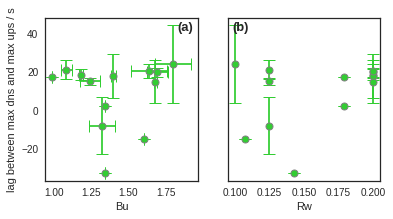

In [58]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(6,3))

rho0 = 998.5
g = 9.81
W = 0.05 # m
L = 0.12 # m

for exp, kk in zip(exp_dicts, range(exp_num)):
    lag = np.zeros(len(exp['run_files']))
    N = np.ones(len(exp['run_files']))*np.nan
    for ii,col in zip(range(len(exp['run_files'])),colors):
        filepath = exp['dir']+exp['run_files'][ii]
        mat = sio.loadmat(filepath, squeeze_me=True)
        P1 = mat['ch1']
        P2 = mat['ch2']
        dt = mat['dt']
        time = mat['time']
        if exp['calibration']=='09Aug19':
            dens1 = ctools.densANK1_09Aug19(P1)
            dens2 = ctools.densANK2_09Aug19(P2)
        else:
            dens1 = ctools.densANK1_17Aug19(P1)
            dens2 = ctools.densANK2_17Aug19(P2)
        
        inertial_period = 1/((exp["fo"])/(2*np.pi))
        win = int(inertial_period/dt)
        
        rho1 = 1000*(ctools.filter_timeseries((dens1[0:2400]-dens1[0]),winlen=win)) # kg/m^3
        rho2 = 1000*(ctools.filter_timeseries((dens2[0:2400]-dens2[0]),winlen=win)) # kg/m^3
        
        lag[ii] = time[np.argmax(rho2)]-time[np.argmax(rho1)]
        
        if np.isnan(exp["rho_sb"][ii])==True:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii-1]-1000*exp["rho_top"][ii-1])/(exp["hsb"]*0.01)))**0.5
        else:
            N[ii] =((g/rho0)*((1000*exp["rho_sb"][ii]-1000*exp["rho_top"][ii])/(exp["hsb"]*0.01)))**0.5
    
    W = 5 # cm
    Bu = np.nanmean(N*exp["hsb"]/(exp["fo"]*W))
    stdBu = np.nanstd(N*exp["hsb"]/(exp["fo"]*W))
    Rw = exp["U"]/(exp["fo"]*W)
    lag_mean = np.nanmean(lag)
    lag_std = np.nanstd(lag)
    sca = ax1.errorbar(Bu,lag_mean,yerr=lag_std,xerr=stdBu,
                       marker='o',color='limegreen',
                       markeredgecolor='0.5', markeredgewidth=1,capsize=6) 
          
    sca2 = ax2.errorbar(Rw,lag_mean,yerr=lag_std,
                        marker='o',color='limegreen',
                        markeredgecolor='0.5', markeredgewidth=1,capsize=6)
    

ax3.set_ylim(0.08,0.225)
ax1.set_xlabel('Bu')
ax2.set_xlabel('Rw')
ax2.set_yticklabels([])

ax1.set_ylabel(r'lag between max dns and max ups / s')
ax1.text(0.87,0.92,'(a)', fontweight='bold', fontsize=13, transform=ax1.transAxes)
ax2.text(0.03,0.92,'(b)', fontweight='bold', fontsize=13, transform=ax2.transAxes)

plt.savefig('figures/ch4_lag_Bu_Rw_twocan_std.pdf', format='pdf', transparent=False, bbox_inches='tight')